In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from scipy import interpolate
file_name = "simulation_test2.h5"
f = h5py.File(file_name, "r")

In [2]:
def create_list_of_datasets_in_h5file(h5_file):
    """
    Returns a list of the paths of all datasets in an h5 file.
    Can also be used to list all datasets under a given node (e.g., f['session001']).  In this case,
    the 'session001' is not included in the output paths.
    This comes from:
    https://stackoverflow.com/questions/44883175/how-to-list-all-datasets-in-h5py-file
    :param f:
    :return:
    """
    keys = []
    h5_file.visit(lambda key: keys.append(key) if type(h5_file[key]) is h5py._hl.dataset.Dataset else None)
    return keys


def create_list_of_groups_in_node(node):
    keys = []
    node.visit(lambda key: keys.append(key) if type(node[key]) is h5py._hl.group.Group else None)
    return keys

def create_list_of_items_in_node(item_type, h5_file, node):
    keys = []
    if item_type == "group":
        my_type = h5py._hl.group.Group
    if item_type == "dataset":
        my_type = h5py._hl.dataset.Dataset
    h5_file[node].visit(lambda key: keys.append(key) if type(h5_file[node][key]) is my_type else None)
    return keys

def create_list_of_insertions_in_node(h5_file, node):
    insertions = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'ins':
            insertions.append(group)
    return insertions

def create_session_insertion_dict(h5_file):
    keys = list(h5_file.keys())
    key_dict = {}
    for key in keys:
        # session_number = int(key[-3:])
        key_dict[key] = create_list_of_insertions_in_node(h5_file, key)
    print(key_dict)
    return key_dict

def create_list_of_calibrations_in_node(h5_file, node):
    calibrations = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'cal':
            calibrations.append(group)
    return calibrations


def create_session_calibration_dict(h5_file):
    keys = list(h5_file.keys())
    key_dict = {}
    for key in keys:
        key_dict[key] = create_list_of_calibrations_in_node(h5_file, key)
    print(key_dict)
    return key_dict

def get_wavelengths_vector(h5_file, session, insertion, spectrometer):
    if spectrometer == "spectrometer1":
        vector_attr = "spec1_wavelengths_vector"
    elif spectrometer == "spectrometer2":
        vector_attr = "spec2_wavelengths_vector"
    else:
        print("spectrometer not specified")
        vector_attr = ""

    insertion_group = h5_file[f"{session}/{insertion}"]
    wavelengths_vector = insertion_group.parent.attrs[vector_attr][:]
    return wavelengths_vector

def get_absorbance_spectra_in_insertion(h5_file, session, insertion):
    absorbance_string = "spectrometer1/derived/absorbances"
    absorbance_spectra = h5_file[f"{session}/{insertion}/{absorbance_string}"][:]
    print(absorbance_spectra)
    return absorbance_spectra

def get_absorbance_spectra_and_depth_in_insertion(h5_file, session, insertion):
    dset_string = "derived/absorbance_depth"
    dset = h5_file[f"{session}/{insertion}/{dset_string}"]
    absorbance_spectra = dset[:, :-2]
    depths = dset[:, -1]
    forces = dset[:, -2]
    print(absorbance_spectra)
    return absorbance_spectra, depths, forces

def get_current_time():
    return np.datetime64(datetime.datetime.now()).astype(np.int64)


def timestamp_list_to_pandas_timestamps(timestamp_list):
    series = pd.Series(timestamp_list).astype('<M8[us]')
    return series


In [3]:
groups = create_list_of_groups_in_node(f)
groups

['session001',
 'session001/cal001',
 'session001/cal001/ins001',
 'session001/cal001/ins001/derived',
 'session001/cal001/ins001/encoder',
 'session001/cal001/ins001/load_cell',
 'session001/cal001/ins001/spectrometer1',
 'session001/cal001/ins001/spectrometer1/derived',
 'session001/cal001/ins002',
 'session001/cal001/ins002/derived',
 'session001/cal001/ins002/encoder',
 'session001/cal001/ins002/load_cell',
 'session001/cal001/ins002/spectrometer1',
 'session001/cal001/ins002/spectrometer1/derived',
 'session001/cal001/ins003',
 'session001/cal001/ins003/derived',
 'session001/cal001/ins003/encoder',
 'session001/cal001/ins003/load_cell',
 'session001/cal001/ins003/spectrometer1',
 'session001/cal001/ins003/spectrometer1/derived',
 'session001/cal002',
 'session001/cal002/ins004',
 'session001/cal002/ins004/derived',
 'session001/cal002/ins004/encoder',
 'session001/cal002/ins004/load_cell',
 'session001/cal002/ins004/spectrometer1',
 'session001/cal002/ins004/spectrometer1/derived

In [4]:
insertion = 'session012/cal001/ins003'

In [5]:
dsets = create_list_of_datasets_in_h5file(f)

In [6]:
dsets

['session001/cal001/ins001/derived/absorbance_depth',
 'session001/cal001/ins001/derived/absorbance_depth_timestamps',
 'session001/cal001/ins001/derived/force_depth',
 'session001/cal001/ins001/derived/force_depth_timestamps',
 'session001/cal001/ins001/encoder/depths',
 'session001/cal001/ins001/encoder/timestamps',
 'session001/cal001/ins001/load_cell/forces',
 'session001/cal001/ins001/load_cell/timestamps',
 'session001/cal001/ins001/spectrometer1/derived/absorbances',
 'session001/cal001/ins001/spectrometer1/spectra',
 'session001/cal001/ins001/spectrometer1/timestamps',
 'session001/cal001/ins002/derived/absorbance_depth',
 'session001/cal001/ins002/derived/absorbance_depth_timestamps',
 'session001/cal001/ins002/derived/force_depth',
 'session001/cal001/ins002/derived/force_depth_timestamps',
 'session001/cal001/ins002/encoder/depths',
 'session001/cal001/ins002/encoder/timestamps',
 'session001/cal001/ins002/load_cell/forces',
 'session001/cal001/ins002/load_cell/timestamps',


In [7]:
forces = 'session012/cal001/ins003/load_cell/forces'
force_timestamps = 'session012/cal001/ins003/load_cell/timestamps'
depths = 'session012/cal001/ins003/encoder/depths'
depth_timestamps = 'session012/cal001/ins003/encoder/timestamps'
force_depth = 'session012/cal001/ins003/derived/force_depth'
force_depth_timestamps = 'session012/cal001/ins003/derived/force_depth_timestamps'

In [8]:
print(f[forces][:])

[29.03639952 44.59432639 50.03308722 57.18437758 28.24391123 66.92099891
 61.30141462 35.35176692 36.50895081 67.96905686 36.06301434 47.16921006
 49.50661281 60.97937832 66.18823187 55.18490803 50.68878626 70.2930916
 36.81851123 48.828937   50.88855765 47.63463325 39.14291858 54.92460536
 78.52665892 44.25279792 40.58881471 34.54808736 43.80504902 49.73265713
 50.11622226 41.80005453 60.72694916 52.92111244 55.70904996 70.04922733
 69.52077824 53.75571115 57.89832857 29.57652527 41.73661567 50.84832362
 56.60477145 27.50895558 48.33527745 64.08815095 57.73907769 55.08365969
 55.55558208 67.30239137 75.80104558 53.7546155  41.30319049 59.71935205
 54.95027841 60.02520865 74.05428648 22.72559107 62.4104803  56.46078439
 60.4797313  70.52805545 37.36613492 41.38051747 53.26402307 48.27332609
 64.45259334 57.78216544 44.33686664 53.43822676 57.40801943 52.22873994
 56.70682361 64.33763003 62.53099505 60.24336558 57.76200295 44.68363074
 64.14807149 28.02542686 34.55366819 74.70179546 56.

In [9]:
print(f[force_depth][:])

[[29.03639952  0.20817084]
 [44.59432639  1.71897576]
 [50.03308722  3.00710685]
 [57.18437758  4.0395378 ]
 [28.24391123  4.63207915]
 [66.92099891  5.31877957]
 [61.30141462  6.42624345]
 [35.35176692  7.20797875]
 [36.50895081  8.09628373]
 [67.96905686  9.19228764]
 [36.06301434  9.79437677]
 [47.16921006 11.46285882]
 [49.50661281 12.9869372 ]
 [60.97937832 14.05760305]
 [66.18823187 14.86853539]
 [55.18490803 16.11810841]
 [50.68878626 17.31931317]
 [70.2930916  18.08892355]
 [36.81851123 19.08876747]
 [48.828937   20.13852631]
 [50.88855765 20.90147065]
 [47.63463325 22.09474473]
 [39.14291858 23.02013552]
 [54.92460536 24.19472884]
 [78.52665892 24.82899315]
 [44.25279792 25.8640615 ]
 [40.58881471 26.90221924]
 [34.54808736 27.85681101]
 [43.80504902 29.16027283]
 [49.73265713 30.08048713]
 [50.11622226 31.47707257]
 [41.80005453 32.41993202]
 [60.72694916 33.65176493]
 [52.92111244 34.6399476 ]
 [55.70904996 35.85810236]
 [70.04922733 36.85313467]
 [69.52077824 38.36064205]
 

In [10]:
force = f[force_depth][:, 0]

In [11]:
force

array([29.03639952, 44.59432639, 50.03308722, 57.18437758, 28.24391123,
       66.92099891, 61.30141462, 35.35176692, 36.50895081, 67.96905686,
       36.06301434, 47.16921006, 49.50661281, 60.97937832, 66.18823187,
       55.18490803, 50.68878626, 70.2930916 , 36.81851123, 48.828937  ,
       50.88855765, 47.63463325, 39.14291858, 54.92460536, 78.52665892,
       44.25279792, 40.58881471, 34.54808736, 43.80504902, 49.73265713,
       50.11622226, 41.80005453, 60.72694916, 52.92111244, 55.70904996,
       70.04922733, 69.52077824, 53.75571115, 57.89832857, 29.57652527,
       41.73661567, 50.84832362, 56.60477145, 27.50895558, 48.33527745,
       64.08815095, 57.73907769, 55.08365969, 55.55558208, 67.30239137,
       75.80104558, 53.7546155 , 41.30319049, 59.71935205, 54.95027841,
       60.02520865, 74.05428648, 22.72559107, 62.4104803 , 56.46078439,
       60.4797313 , 70.52805545, 37.36613492, 41.38051747, 53.26402307,
       48.27332609, 64.45259334, 57.78216544, 44.33686664, 53.43

In [12]:
depth = f[force_depth][:, 1]

In [13]:
depth

array([ 0.20817084,  1.71897576,  3.00710685,  4.0395378 ,  4.63207915,
        5.31877957,  6.42624345,  7.20797875,  8.09628373,  9.19228764,
        9.79437677, 11.46285882, 12.9869372 , 14.05760305, 14.86853539,
       16.11810841, 17.31931317, 18.08892355, 19.08876747, 20.13852631,
       20.90147065, 22.09474473, 23.02013552, 24.19472884, 24.82899315,
       25.8640615 , 26.90221924, 27.85681101, 29.16027283, 30.08048713,
       31.47707257, 32.41993202, 33.65176493, 34.6399476 , 35.85810236,
       36.85313467, 38.36064205, 39.36703939, 40.92705594, 42.25618612,
       43.13952095, 44.22038111, 45.75940643, 46.56726274, 47.80870499,
       48.76540253, 50.07822417, 51.22013996, 51.91809338, 53.03521615,
       54.26928688, 55.29312886, 56.68939098, 57.71881115, 58.30546535,
       59.11394103, 60.18840782, 61.63613062, 62.72187059, 64.31842478,
       65.37397598, 66.12852089, 67.56111512, 67.95776718, 69.05914673,
       69.80445681, 70.40548343, 71.96052662, 72.76832615, 73.65

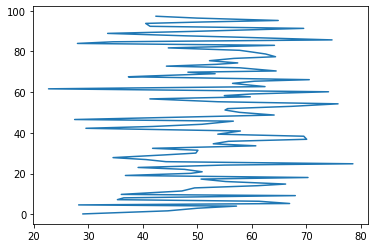

In [14]:
plt.plot(force, depth)

In [15]:
interp_f = interpolate.interp1d(depth, force, kind='linear', fill_value='extrapolate')

In [16]:
regular_depths = np.arange(0.0, 100.0, 5.0)

In [17]:
regular_depths

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [18]:
new_force = interp_f(regular_depths)

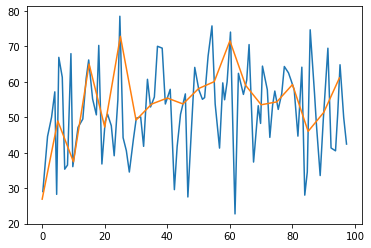

In [19]:
plt.plot(depth, force)
plt.plot(regular_depths, new_force)

In [20]:
interp_f_slinear = interpolate.interp1d(depth, force, kind='slinear', fill_value='extrapolate')

In [21]:
slinear_force = interp_f_slinear(regular_depths)

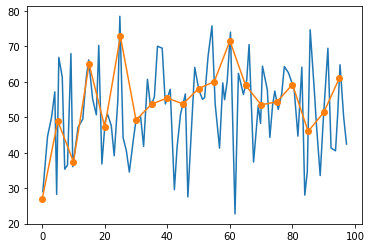

In [22]:
plt.plot(depth, force)
plt.plot(regular_depths, slinear_force, "-o")

In [23]:
min_depth = 0.0
max_depth = 100.0
step_size = 5.0

In [24]:
bin_centers = np.arange((min_depth + (step_size/2)), max_depth, step_size)

In [25]:
bin_centers

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5])

In [26]:
bin_center = bin_centers[2]
bin_min = bin_center - step_size/2
bin_max = bin_center + step_size/2


In [27]:
depths_min = depth - bin_min

In [28]:
depths_min

array([-9.79182916, -8.28102424, -6.99289315, -5.9604622 , -5.36792085,
       -4.68122043, -3.57375655, -2.79202125, -1.90371627, -0.80771236,
       -0.20562323,  1.46285882,  2.9869372 ,  4.05760305,  4.86853539,
        6.11810841,  7.31931317,  8.08892355,  9.08876747, 10.13852631,
       10.90147065, 12.09474473, 13.02013552, 14.19472884, 14.82899315,
       15.8640615 , 16.90221924, 17.85681101, 19.16027283, 20.08048713,
       21.47707257, 22.41993202, 23.65176493, 24.6399476 , 25.85810236,
       26.85313467, 28.36064205, 29.36703939, 30.92705594, 32.25618612,
       33.13952095, 34.22038111, 35.75940643, 36.56726274, 37.80870499,
       38.76540253, 40.07822417, 41.22013996, 41.91809338, 43.03521615,
       44.26928688, 45.29312886, 46.68939098, 47.71881115, 48.30546535,
       49.11394103, 50.18840782, 51.63613062, 52.72187059, 54.31842478,
       55.37397598, 56.12852089, 57.56111512, 57.95776718, 59.05914673,
       59.80445681, 60.40548343, 61.96052662, 62.76832615, 63.65

In [29]:
depths_max = depth - bin_max

In [30]:
depths_max

array([-14.79182916, -13.28102424, -11.99289315, -10.9604622 ,
       -10.36792085,  -9.68122043,  -8.57375655,  -7.79202125,
        -6.90371627,  -5.80771236,  -5.20562323,  -3.53714118,
        -2.0130628 ,  -0.94239695,  -0.13146461,   1.11810841,
         2.31931317,   3.08892355,   4.08876747,   5.13852631,
         5.90147065,   7.09474473,   8.02013552,   9.19472884,
         9.82899315,  10.8640615 ,  11.90221924,  12.85681101,
        14.16027283,  15.08048713,  16.47707257,  17.41993202,
        18.65176493,  19.6399476 ,  20.85810236,  21.85313467,
        23.36064205,  24.36703939,  25.92705594,  27.25618612,
        28.13952095,  29.22038111,  30.75940643,  31.56726274,
        32.80870499,  33.76540253,  35.07822417,  36.22013996,
        36.91809338,  38.03521615,  39.26928688,  40.29312886,
        41.68939098,  42.71881115,  43.30546535,  44.11394103,
        45.18840782,  46.63613062,  47.72187059,  49.31842478,
        50.37397598,  51.12852089,  52.56111512,  52.95

In [31]:
depth

array([ 0.20817084,  1.71897576,  3.00710685,  4.0395378 ,  4.63207915,
        5.31877957,  6.42624345,  7.20797875,  8.09628373,  9.19228764,
        9.79437677, 11.46285882, 12.9869372 , 14.05760305, 14.86853539,
       16.11810841, 17.31931317, 18.08892355, 19.08876747, 20.13852631,
       20.90147065, 22.09474473, 23.02013552, 24.19472884, 24.82899315,
       25.8640615 , 26.90221924, 27.85681101, 29.16027283, 30.08048713,
       31.47707257, 32.41993202, 33.65176493, 34.6399476 , 35.85810236,
       36.85313467, 38.36064205, 39.36703939, 40.92705594, 42.25618612,
       43.13952095, 44.22038111, 45.75940643, 46.56726274, 47.80870499,
       48.76540253, 50.07822417, 51.22013996, 51.91809338, 53.03521615,
       54.26928688, 55.29312886, 56.68939098, 57.71881115, 58.30546535,
       59.11394103, 60.18840782, 61.63613062, 62.72187059, 64.31842478,
       65.37397598, 66.12852089, 67.56111512, 67.95776718, 69.05914673,
       69.80445681, 70.40548343, 71.96052662, 72.76832615, 73.65

In [32]:
bin_centers[2]

12.5

In [33]:
bin_min

10.0

In [34]:
bin_max

15.0

In [35]:
bin_mins = np.arange(0.0, 95.1, 5.0)
bin_mins

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [36]:
bin_maxs = np.arange(5.0, 100.1, 5.0)

In [37]:
bin_maxs

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [38]:
bin_centers

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5])

In [39]:
bin_mins.shape

(20,)

In [40]:
bin_centers.shape

(20,)

In [41]:
weights = []
bin_forces = []
bin_number = 0
for i in range(depth.shape[0]):
    if depth[i] >= bin_min:
        weight = depth[i] - bin_min
        weights.append(weight)
        if sum(weights) > 5.0:
            weights.pop()
            weights.append(5.0 - sum(weights))
            bin_forces.append(force[i])
            if sum(weights) == 5.0:
                break
        elif sum(weights) < 5.0:
            bin_forces.append(force[i])
            
weighted_average = np.average(bin_forces, weights=weights)        
print(i)
print(sum(weights))
print(weights)
print(bin_forces)
print(weighted_average)
            
    
    

13
5.0
[1.4628588209556632, 2.986937198419902, 0.5502039806244348]
[47.16921006220804, 49.50661280800933, 60.97937831827479]
50.08522701354881


In [42]:
step = 5.0
weighted_force = []

for j in range(bin_mins.shape[0]):
    bin_number = j
    weights = []
    bin_forces = []
    bin_min = bin_mins[bin_number]
    for i in range(depth.shape[0]):    
        if depth[i] < bin_min:
            pass
        if depth[i] >= bin_min:
            if i == 0:
                weight = depth[i] - bin_min          
            elif depth[i-1] <= bin_min:
                weight = depth[i] - bin_min
            else:
                weight = depth[i] - depth[i-1]
            weights.append(weight)            
            if sum(weights) >= step:
                weights.pop()
                weights.append(step - sum(weights))
                bin_forces.append(force[i])
                break
            elif sum(weights) < step:
                bin_forces.append(force[i])

    print(weights)
    print(bin_forces)
    bin_weighted_average = np.average(bin_forces, weights=weights)
    print(bin_weighted_average)
    weighted_force.append(bin_weighted_average)
print(weighted_force)

[0.2081708449864452, 1.5108049126155796, 1.2881310937687431, 1.032430949917151, 0.5925413533877348, 0.3679208453243463]
[29.03639952426846, 44.594326385337126, 50.03308722260136, 57.1843775801388, 28.24391123375987, 66.92099890850687]
47.65265434240473
[0.3187795683211352, 1.1074638770810985, 0.7817353039525257, 0.888304984830298, 1.0960039045732621, 0.6020891310700538, 0.20562323017162676]
[66.92099890850687, 61.30141462243497, 35.35176691734257, 36.50895081057468, 67.96905686205234, 36.06301434332754, 47.16921006220804]
51.03910854453673
[1.4628588209556632, 1.5240783774642388, 1.0706658527606248, 0.810932334339098, 0.13146461448037527]
[47.16921006220804, 49.50661280800933, 60.97937831827479, 66.18823186541535, 55.18490802565238]
54.134286251653464
[1.1181084080281636, 1.201204763609283, 0.7696103758061952, 0.9998439240248409, 0.9112325285315173]
[55.18490802565238, 50.68878625955328, 70.29309159813496, 36.81851123364082, 48.828937004020084]
51.599178859597295
[0.13852631145655536, 

In [43]:
force

array([29.03639952, 44.59432639, 50.03308722, 57.18437758, 28.24391123,
       66.92099891, 61.30141462, 35.35176692, 36.50895081, 67.96905686,
       36.06301434, 47.16921006, 49.50661281, 60.97937832, 66.18823187,
       55.18490803, 50.68878626, 70.2930916 , 36.81851123, 48.828937  ,
       50.88855765, 47.63463325, 39.14291858, 54.92460536, 78.52665892,
       44.25279792, 40.58881471, 34.54808736, 43.80504902, 49.73265713,
       50.11622226, 41.80005453, 60.72694916, 52.92111244, 55.70904996,
       70.04922733, 69.52077824, 53.75571115, 57.89832857, 29.57652527,
       41.73661567, 50.84832362, 56.60477145, 27.50895558, 48.33527745,
       64.08815095, 57.73907769, 55.08365969, 55.55558208, 67.30239137,
       75.80104558, 53.7546155 , 41.30319049, 59.71935205, 54.95027841,
       60.02520865, 74.05428648, 22.72559107, 62.4104803 , 56.46078439,
       60.4797313 , 70.52805545, 37.36613492, 41.38051747, 53.26402307,
       48.27332609, 64.45259334, 57.78216544, 44.33686664, 53.43

In [44]:
depth

array([ 0.20817084,  1.71897576,  3.00710685,  4.0395378 ,  4.63207915,
        5.31877957,  6.42624345,  7.20797875,  8.09628373,  9.19228764,
        9.79437677, 11.46285882, 12.9869372 , 14.05760305, 14.86853539,
       16.11810841, 17.31931317, 18.08892355, 19.08876747, 20.13852631,
       20.90147065, 22.09474473, 23.02013552, 24.19472884, 24.82899315,
       25.8640615 , 26.90221924, 27.85681101, 29.16027283, 30.08048713,
       31.47707257, 32.41993202, 33.65176493, 34.6399476 , 35.85810236,
       36.85313467, 38.36064205, 39.36703939, 40.92705594, 42.25618612,
       43.13952095, 44.22038111, 45.75940643, 46.56726274, 47.80870499,
       48.76540253, 50.07822417, 51.22013996, 51.91809338, 53.03521615,
       54.26928688, 55.29312886, 56.68939098, 57.71881115, 58.30546535,
       59.11394103, 60.18840782, 61.63613062, 62.72187059, 64.31842478,
       65.37397598, 66.12852089, 67.56111512, 67.95776718, 69.05914673,
       69.80445681, 70.40548343, 71.96052662, 72.76832615, 73.65

In [45]:
bin_weighted_average

48.264955380388635

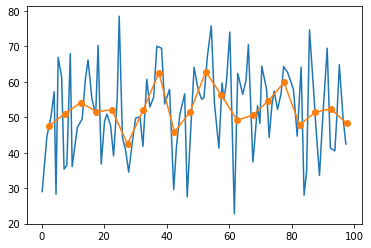

In [46]:
plt.plot(depth, force)
plt.plot(bin_centers, weighted_force, "-o")

In [47]:
absorb_string = 'session012/cal001/ins003/derived/absorbance_depth'

In [48]:
f[absorb_string][:, -1]

array([ 0.20817084,  2.63598446,  4.38395732,  5.64479418,  7.24765674,
        9.24296437, 11.15246335, 13.68255466, 15.69645544, 17.6474673 ,
       19.08876747, 20.90147065, 22.64758332, 24.6440933 , 26.27080448,
       28.2176177 , 30.08048713, 32.09185115, 34.20952293, 36.22524898,
       38.61003438, 41.15772535, 42.83106477, 45.29170716, 47.21422079,
       49.42790932, 51.51423622, 53.03521615, 55.22806467, 57.41845705,
       58.72604148, 60.72810734, 63.0645109 , 65.36665788, 67.48522759,
       68.71543831, 70.19205888, 71.96052662, 73.65067446, 75.42026676,
       77.36244217, 79.2188693 , 80.809298  , 83.22955187, 84.734879  ,
       86.49653278, 88.43715241, 90.32605912, 92.54212338, 94.45680687,
       96.00391662])

In [49]:
f[absorb_string][:, -2]

array([29.03639952, 50.03308722, 28.24391123, 66.92099891, 35.35176692,
       67.96905686, 47.16921006, 60.97937832, 55.18490803, 50.68878626,
       36.81851123, 50.88855765, 39.14291858, 78.52665892, 44.25279792,
       34.54808736, 49.73265713, 41.80005453, 52.92111244, 55.70904996,
       69.52077824, 57.89832857, 41.73661567, 56.60477145, 48.33527745,
       64.08815095, 55.08365969, 67.30239137, 53.7546155 , 59.71935205,
       54.95027841, 74.05428648, 62.4104803 , 60.4797313 , 37.36613492,
       53.26402307, 48.27332609, 57.78216544, 53.43822676, 52.22873994,
       64.33763003, 62.53099505, 57.76200295, 64.14807149, 34.55366819,
       56.64581284, 33.55902992, 49.19886615, 41.33606119, 50.96959953,
       49.95236415])

In [50]:
f[absorb_string][0, :-2]

array([0.84194035, 0.8290654 , 0.83331382, 0.83393406, 0.83587999,
       0.82618511, 0.82051873, 0.81867325, 0.79953423, 0.81735107,
       0.81177894, 0.80652307, 0.80116708, 0.80183809, 0.80851764,
       0.80806308, 0.81264008, 0.80861683, 0.78637874, 0.77740149,
       0.78344753, 0.80387183, 0.79813974, 0.77954194, 0.81384128,
       0.80722892, 0.80105297, 0.80054227, 0.79830985, 0.80708485,
       0.78147257, 0.81003175, 0.78980896, 0.82752964, 0.80068438,
       0.78503832, 0.79177745, 0.8035451 , 0.84218777, 0.81145697,
       0.80858448, 0.82018341, 0.82512919, 0.82667298, 0.82138011,
       0.84510197, 0.80214567, 0.82506424, 0.80223332, 0.84657407,
       0.83586159, 0.8196996 , 0.82824862, 0.85922447, 0.81669062,
       0.85405623, 0.8037689 , 0.81117083, 0.83108483, 0.85256084,
       0.83083082, 0.84121114, 0.84067348, 0.82602579, 0.83336386,
       0.82124003, 0.8137313 , 0.87541169, 0.83797206, 0.85342623,
       0.86775781, 0.87055061, 0.87561316, 0.86437249, 0.85648

In [51]:
absorbances = f[absorb_string][:, :-2]

In [52]:
absorbances

array([[0.84194035, 0.8290654 , 0.83331382, ..., 1.21914795, 1.16356428,
        1.35837461],
       [0.84240488, 0.83504382, 0.83149244, ..., 1.2003397 , 1.20634406,
        1.37684916],
       [0.84373123, 0.8329363 , 0.83171938, ..., 1.21384865, 1.21594736,
        1.3348489 ],
       ...,
       [0.84354403, 0.83239759, 0.83515361, ..., 1.21448484, 1.21320101,
        1.35235225],
       [0.84084816, 0.83142671, 0.8378247 , ..., 1.23572411, 1.19398532,
        1.32789153],
       [0.84444666, 0.82868655, 0.83209898, ..., 1.19938113, 1.16906148,
        1.38365439]])

In [53]:
absorbance_depths = f[absorb_string][:, -1]

In [54]:
absorbance_depths

array([ 0.20817084,  2.63598446,  4.38395732,  5.64479418,  7.24765674,
        9.24296437, 11.15246335, 13.68255466, 15.69645544, 17.6474673 ,
       19.08876747, 20.90147065, 22.64758332, 24.6440933 , 26.27080448,
       28.2176177 , 30.08048713, 32.09185115, 34.20952293, 36.22524898,
       38.61003438, 41.15772535, 42.83106477, 45.29170716, 47.21422079,
       49.42790932, 51.51423622, 53.03521615, 55.22806467, 57.41845705,
       58.72604148, 60.72810734, 63.0645109 , 65.36665788, 67.48522759,
       68.71543831, 70.19205888, 71.96052662, 73.65067446, 75.42026676,
       77.36244217, 79.2188693 , 80.809298  , 83.22955187, 84.734879  ,
       86.49653278, 88.43715241, 90.32605912, 92.54212338, 94.45680687,
       96.00391662])

In [55]:
absorbances.shape

(51, 161)

In [56]:
absorbance_depths.shape

(51,)

In [63]:
def calculate_weighted_averages_by_depth_increment(data, depths, step, bin_mins):
    
    weighted_data = []

    for j in range(bin_mins.shape[0]):
        bin_number = j
        weights = []
        bin_data = []
        bin_min = bin_mins[bin_number]
        for i in range(data.shape[0]):    
            if depths[i] < bin_min:
                pass
            if depths[i] >= bin_min:
                if i == 0:
                    weight = depths[i] - bin_min          
                elif depths[i-1] <= bin_min:
                    weight = depths[i] - bin_min
                else:
                    weight = depths[i] - depths[i-1]
                weights.append(weight)            
                if sum(weights) >= step:
                    weights.pop()
                    weights.append(step - sum(weights))
                    bin_data.append(data[i])
                    break
                elif sum(weights) < step:
                    bin_data.append(data[i])

        # print(weights)
        # print(bin_data)
        bin_weighted_average = np.average(bin_data, weights=weights, axis=0)
        # print(bin_weighted_average)
        weighted_data.append(bin_weighted_average)
    print(weighted_data)
    return weighted_data

In [64]:
weighted_data = calculate_weighted_averages_by_depth_increment(force, depth, 5.0, bin_mins)

[47.65265434240473, 51.03910854453673, 54.134286251653464, 51.599178859597295, 52.10823245140405, 42.44282464929556, 52.11307188241917, 62.61107281988298, 45.78870489624016, 51.56245241005384, 62.84015779562549, 56.25712255940234, 49.195700767697836, 50.60489934359975, 54.613570290911795, 59.83197774151033, 47.855042644213825, 51.397969859023064, 52.44474523655107, 48.264955380388635]


In [59]:
weighted_data

[47.65265434240473,
 51.03910854453673,
 54.134286251653464,
 51.599178859597295,
 52.10823245140405,
 42.44282464929556,
 52.11307188241917,
 62.61107281988298,
 45.78870489624016,
 51.56245241005384,
 62.84015779562549,
 56.25712255940234,
 49.195700767697836,
 50.60489934359975,
 54.613570290911795,
 59.83197774151033,
 47.855042644213825,
 51.397969859023064,
 52.44474523655107,
 48.264955380388635]

In [65]:
weighted_absorb = calculate_weighted_averages_by_depth_increment(absorbances, absorbance_depths, 5.0, bin_mins)

[array([0.84320213, 0.83326291, 0.83190135, 0.83374413, 0.84033444,
       0.82513508, 0.8256238 , 0.82200251, 0.80494589, 0.81890882,
       0.80764813, 0.80988704, 0.79645961, 0.80744545, 0.80530395,
       0.80962274, 0.80769335, 0.81447327, 0.78198947, 0.77952846,
       0.7845375 , 0.80061065, 0.80345236, 0.78320955, 0.81343003,
       0.80906162, 0.8005249 , 0.80101217, 0.80219665, 0.8011089 ,
       0.78595171, 0.80246053, 0.79359893, 0.82514444, 0.80494815,
       0.78960483, 0.79740302, 0.80544252, 0.84440437, 0.81021006,
       0.80622551, 0.82209331, 0.82652482, 0.82851003, 0.82284175,
       0.84857163, 0.79737334, 0.81739247, 0.79963904, 0.83741798,
       0.83060192, 0.81620528, 0.82929685, 0.86479068, 0.81573383,
       0.85281469, 0.81446758, 0.81079668, 0.83334264, 0.84298748,
       0.82740372, 0.84211976, 0.83360694, 0.81908199, 0.84052653,
       0.82655844, 0.81408576, 0.8645727 , 0.84107464, 0.8488161 ,
       0.87637522, 0.87010892, 0.86980182, 0.85705382, 0.8621

In [67]:
weighted_absorb[0].shape

(161,)

In [84]:
def calculate_number_of_steps(depth_min, depth_max, depth_increment):
    depth_range = depth_max - depth_min
    number_of_steps = int(depth_range // depth_increment)
    remainder = depth_increment % depth_range
    return number_of_steps, remainder

In [93]:
def calculate_depth_bins(depth_min=0.0, depth_max=100.0, depth_increment=5.0):    
    bin_mins = np.arange(depth_min, depth_max, depth_increment)
    bin_centers = bin_mins + depth_increment/2.0
    return bin_mins, bin_centers

In [94]:
bin_mins, bin_centers = calculate_depth_bins()

In [95]:
bin_mins

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [96]:
bin_centers

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5])

In [97]:
bin_mins2, bin_centers2 = calculate_depth_bins(0.0, 110.0, 11.0)

In [98]:
bin_mins2

array([ 0., 11., 22., 33., 44., 55., 66., 77., 88., 99.])

In [99]:
bin_centers2

array([  5.5,  16.5,  27.5,  38.5,  49.5,  60.5,  71.5,  82.5,  93.5,
       104.5])

In [134]:
def calculate_weighted_averages_by_depth_increment(data, depths, depth_min=0.0, depth_max=100.0, depth_increment=5.0):
    bin_mins, bin_centers = calculate_depth_bins(depth_min, depth_max, depth_increment)    
    weighted_data = []
    for j in range(bin_mins.shape[0]):
        bin_number = j
        weights = []
        bin_data = []
        bin_min = bin_mins[bin_number]
        # sets data for depth increment to zero when bin is outside data range
        if bin_min > depths.max():
            bin_data.append(0.0)
            weights.append(depth_increment)            
        else:
            for i in range(data.shape[0]):            
                if depths[i] < bin_min:                    
                    pass
                if depths[i] >= bin_min:                    
                    if i == 0:
                        weight = depths[i] - bin_min          
                    elif depths[i-1] <= bin_min:
                        weight = depths[i] - bin_min
                    else:                
                        weight = depths[i] - depths[i-1]
                    weights.append(weight)
                    # gets rid of the portion of the data that is outside the depth increment
                    if sum(weights) >= depth_increment:
                        weights.pop()
                        weights.append(depth_increment - sum(weights))
                        bin_data.append(data[i])
                        break
                    elif sum(weights) < depth_increment:
                        bin_data.append(data[i])         
        bin_weighted_average = np.average(bin_data, weights=weights, axis=0)        
        weighted_data.append(bin_weighted_average)
    return weighted_data, bin_mins, bin_centers

In [140]:
weighted_data2, bin_mins2, bin_centers2 = calculate_weighted_averages_by_depth_increment(force, depth, 0.0, 110.0, 10.0)

In [141]:
bin_mins2

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [142]:
bin_centers2

array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.])

In [143]:
weighted_data

[47.65265434240473,
 51.03910854453673,
 54.134286251653464,
 51.599178859597295,
 52.10823245140405,
 42.44282464929556,
 52.11307188241917,
 62.61107281988298,
 45.78870489624016,
 51.56245241005384,
 62.84015779562549,
 56.25712255940234,
 49.195700767697836,
 50.60489934359975,
 54.613570290911795,
 59.83197774151033,
 47.855042644213825,
 51.397969859023064,
 52.44474523655107,
 48.264955380388635]

In [144]:
weighted_data2

[49.34588144347073,
 52.86673255562539,
 47.27552855034981,
 57.36207235115106,
 48.675578653147,
 59.54864017751392,
 49.90030005564879,
 57.222774016211055,
 49.626506251618444,
 51.13680881214219,
 0.0]

In [127]:
depth.max()

97.27716430432568